# Training a Model

In [2]:
import numpy as np
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
%matplotlib inline
%matplotlib widget
    
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Introduction

This chapter focuses on the mathematical aspects of training a model, with special attention to linear algebra to explain the mechanics of gradient descrent and the variations of it.

The author provided a useful resource covering the matrix and vector operations in a supplimentary notebook, if a refresher is required.

We will begin with a simple model, Linear Regression, and look at how the computer learns the parameters which minimises the loss function. 

For linear regression, the model forms a prediction ($\hat{y}$) through a weighted sum of the features ($x$). Each feature has an associated weighted, i.e. a coefficient, that determines its interaction with the prediction (positive or negative, large or small), usually denoted with a $\theta$. $\theta_0$ is the *bias* term, but also the y-intercept. 

### Overall Formula
The overall formula is then:

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$ 

$n = $ Number of Features


### Vector and Matrix Formula
The Vectorised formula is:

$$
\hat{y} = h_\theta(x)
$$

Dot Product Notation:

$$
\hat{y} = \theta.x
$$

Matrix Multiplication Notation:

$$
\hat{y} = \theta^{\intercal}x
$$

- $h_\theta(x)$ is the hypothesis function.
- $\theta$ and $x$ are both vectors, containing $\theta_0$ to $\theta_n$ and $x_0$ to $x_n$, respectively. ($x_0$ is always 1)
- Vectors are usually expressed (and stored) as columns, which is why the column vector notation is also presented. To achieve the same as the dot product - we use matrix multiplication which uses the dot product of a row and a column. For matrix multiplication if we want to multiple $A$ and $B$, if $A$ has rows $n$ by $m$ columns, $B$ needs to have $m$ rows.

Remember that:
$$
\theta^{\intercal}x = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

### Loss Formula
Now that we have a equation for our model, we need at way to train the model to have the optimal values for $\theta$.

In other words, we need to find values for $\theta$ that minimises a loss function or maximises a metric for performance or fit. A loss function is usually written as $J(\theta)$. 

A standard approach is using the mean squared error (MSE), where the square the difference between the predicted and real value:

$$
J(\theta) = MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m}(\theta^{\intercal}x^{(i)} - y^{(i)})^2
$$


### Normal Formula
The previous loss function actually has a closed-form solution, where we can directly obtain the optimal values. This is unhelpfully called the Normal Formula.

$$
\hat{\theta} = (X^{\intercal}X)^{-1} X^\intercal y
$$

## Linear Regression

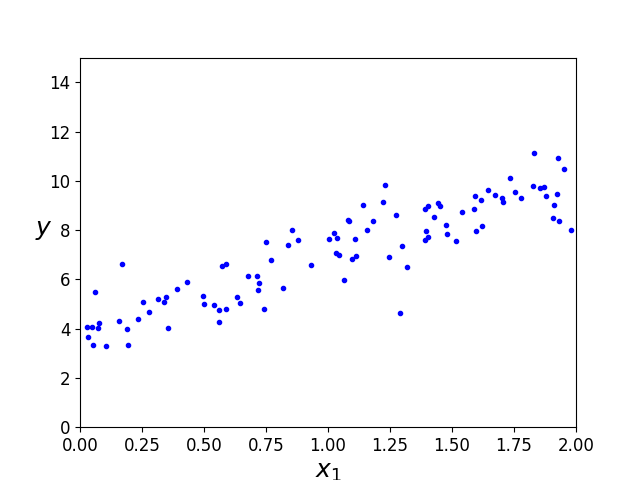

In [78]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X  + np.random.randn(100, 1) ##randn adds random noise to each sample.

fig = plt.figure()
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

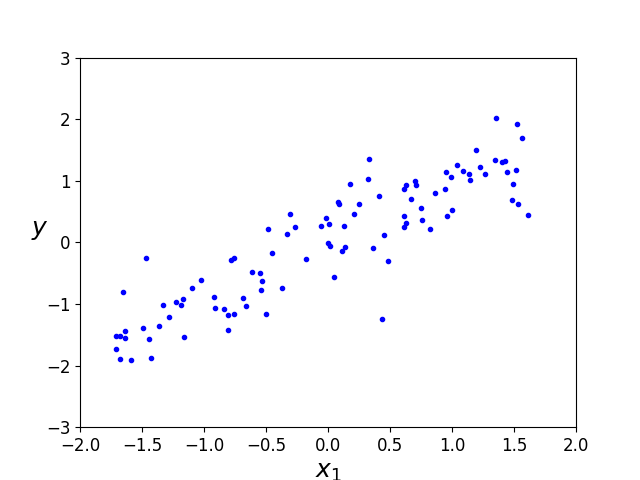

In [80]:
X2 = [(num - np.mean(X)) / np.std(X) for num in X]
y2 = [(num - np.mean(y)) / np.std(y) for num in y]

fig = plt.figure()
plt.plot(X2, y2, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-2, 2, -3, 3])
plt.show()

Let's use the normal formula to find the optimal value for $\theta$.

In [81]:
## need to add column for x0, which has the value of one.
X_b = np.c_[np.ones((100, 1)), X]
X_b2 = np.c_[np.ones((100, 1)), X2]
#X_b
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
best_theta 
## we get theta0 = 4.215 and theta1 = 2.77
## we used a y intercept of 4 and a gradient of 3 -- that is pretty close!

array([[3.95495179],
       [3.04683226]])

In [82]:
## let's try and visualise our model
## we know the limits are 0 and 2, so lets compute the predicted values for them and draw a line between them.

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] ## remember to add in theta 0
prediction =  X_new_b.dot(best_theta)
prediction

array([[ 3.95495179],
       [10.04861632]])

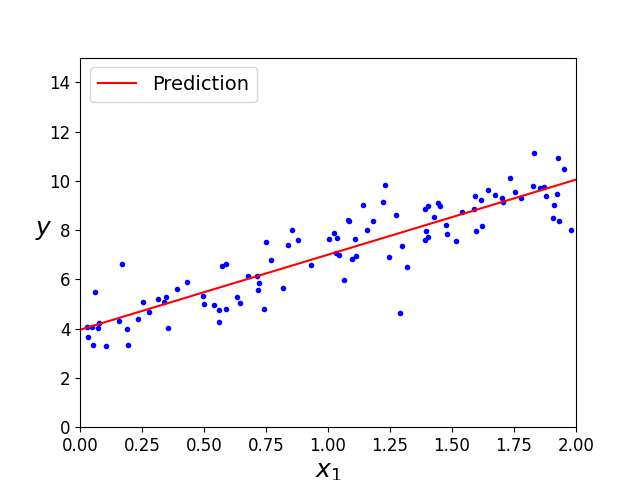

In [84]:
fig = plt.figure()
plt.plot(X, y, "b.")
plt.plot(X_new, prediction, "r-", label = "Prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
## extract the coefficent(s) and intercept
lin_reg.coef_, lin_reg.intercept_

(array([[2.77011339]]), array([4.21509616]))

In [10]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y2)
## extract the coefficent(s) and intercept
lin_reg2.coef_, lin_reg2.intercept_

(array([[0.8770824]]), array([8.44028435e-16]))

In [11]:
lin_prediction = lin_reg.predict(X_new)

## the predictions are identical!!
prediction, lin_prediction

(array([[4.21509616],
        [9.75532293]]),
 array([[4.21509616],
        [9.75532293]]))

### Behind the Scenes

Scikit-Learn uses a function from `scipy` to calculate the least squared - `scipy.linalg.lstsq()` 

In [12]:
import scipy 

thetas, _, _, _ = scipy.linalg.lstsq(X_b, y)
thetas

array([[4.21509616],
       [2.77011339]])

Interestingly, both numpy and scipy do not use the normal equation - instead they use a technique called **Singular Value Decompostion (SVD)**, which is a form of matrix factorisation. 

Normal Equation:
$$
\hat{\theta} = (X^{\intercal}X)^{-1} X^\intercal y
$$

Alternative:
$$
\hat{\theta} = X^+ y
$$

Where $X^+$ is the *pseudoinverse* (actually the Moore-Penrose inverse). In `numpy` this is also in the `linalg` module, under the name `pinv()`. 

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### Singular Value Decomposition (SVD)

Essentially a matrix $X$ can be expressed as three matrices - $U$, $\Sigma$ and $V^\intercal$

The advantage is that if we have a *singular* matrix (a matrix without an inverse), such as where $m \neq n$, if features are reduntant. Whereas the pseudoinverse is better computationally and more stable, because the pseudoinverse is always defined. 

In [14]:
# np.linalg.svd(X_b)

## Gradient Descent

### Cost Function
By defining a cost function, which is parametrised by $\theta$, we can express the process of optimising our model. 

This is the mean squared error (MSE), where we predict the value using $\theta$ and $x$ which is substracted from $y$. This difference is squared, so that the mean of all the squared differences is obtained. 

$$
MSE(X, h_\theta) = J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\theta^{\intercal}x^{(i)} - y^{(i)})^2
$$

This means that the choice of $\theta$ is important, because $X$ and $Y$ are the features and target of our data, respectively. It is these $\theta$ values that the model is "learning". We could randomly select values, and remember the best one, but this is incredibly ineffecient and scales very poorly with the number of features. A much better approach is the mathematically search the parametre space to find the "best" values - or very close to the best values. We can define our optimision objective as:

### Objective
$$
\min\limits_{\theta}J(\theta)
$$

But now we require a strategy or algorithm to search the parametre space in a efficient manner, especially one that scales well with the number of feautres and samples. The most common strategy involves finding the partial deriviative of the cost function - to work out where the global minima may be given our position, and walk towards it, then simply repeat this process. The partial deriviative tells us how we should alter *each* parameter to improve it, or specifically, to obtain a small cost. In general, we can express the rule to update our values as follows:

### Update Rules
$$
\begin{aligned}
\theta_{j} := \theta_{j} - \alpha{\frac{\partial}{\partial \theta}J(\theta)}
\end{aligned}
$$

This is a more general form, given that the partial deriviate of the cost function is dependant on which cost function is used. In our example, we are still using the MSE, but the half-MSE or Root Mean Squared Error (RMSE) are common alternatives.

### Calculating the Partial Derivative

$$
\begin{aligned}
\frac{\partial}{\partial \theta_j}J(\theta) &= \frac{\partial}{\partial \theta_j}[1/m \sum_{i=1}^{m}(\theta^{\intercal}x^{(i)} - y^{(i)})^2]\\
&= \frac{1}{m} \sum_{i=1}^{m}\frac{\partial}{\partial \theta_j}[(\theta^{\intercal}x^{(i)} - y^{(i)})^2] \\
&= \frac{1}{m} \sum_{i=1}^{m}2(\theta^{\intercal}x^{(i)} - y^{(i)})\frac{\partial}{\partial \theta_j}(\theta^{\intercal}x^{(i)} - y^{(i)}) \\
&= \frac{2}{m} \sum_{i=1}^{m}(\theta^{\intercal}x^{(i)} - y^{(i)})x^{(i)}_j \\
\end{aligned}
$$

1) We write the partial derivative of the cost function with respect to $\theta$
2) We can move the term $\frac{1}{m}$ and the summation outside of the partial deriviative.
3) Using the chain rule ( $\frac{d}{dx}f(x)^n = n.f(x)^{n-1}.f'(x)$ ) we can simplify the squared term
4) After moving the 2 outside the sum, the partial deriviate on the right hand side simplifise to just $x^{(i)}_j$
    - This is maybe not obvious, but when we write it as
    - But all the these terms will equal *except* the for when $j$ matches the same $\theta x$ term

$$
\begin{aligned}
\theta^{\intercal}x &= \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n \\
\frac{\partial}{\partial \theta_j} \theta^{\intercal}x &= \frac{\partial}{\partial \theta_j}\theta_0 + \frac{\partial}{\partial \theta_j}\theta_1x_1 + \cdots + \frac{\partial}{\partial \theta_j}\theta_nx_n \\
&= x^{(i)}_j
\end{aligned}
$$

### Re-writing our Update Rule

Now we have an idea of what the partial derivative is, let's put it into our update rule, as this better reflects what the code could look like.

$$
\begin{aligned}
\theta_{j} &:= \theta_{j} - \alpha{\frac{\partial}{\partial \theta}J(\theta)} \\
\theta_{j} &:= \theta_{j} - \alpha{\frac{2}{m} \sum_{i=1}^{m}(\theta^{\intercal}x^{(i)} - y^{(i)})x^{(i)}_j}
\end{aligned}
$$

This is okay, but we are walking into a serious problem. We need to update each theta and if our model has thousands of parameters, updating them sequentially is going to very slow. 

In [88]:
alpha = 0.05 ## sometimes the notation is to use eta as well
n_iter = 1000 ## number of iterations
m = 100 ## number of samples -- X_b.shape = (100,2)

df = pd.DataFrame()

x_values = np.linspace(-50, 50, num=25)
y_values = np.linspace(-50, 50, num=25)
thetas = np.stack(np.meshgrid(x_values, y_values), -1).reshape(-1, 2)


lower_limit, upper_limit = -50, 50
values = np.linspace(lower_limit, upper_limit, num = 50, dtype = int)

border = np.array([[0, 0]])
for v in values:
    line = np.array([[lower_limit, v], [upper_limit, v], [v, lower_limit], [v, upper_limit]])

    border = np.concatenate((border, line))



In [46]:
# np.unique(border, axis=0)

In [91]:
df = pd.DataFrame()

for sim in range(border.shape[0]):

    ## initialise the values before gradient descent. 
    ## theta = np.random.randn(2, 1)
    
    ## rng = np.random.default_rng()
    ## theta = thetas[sim].reshape(2, 1)
    theta = border[sim].reshape(2, 1)
    
    old_cost = 100
    # print(theta)
    all_theta_zero, all_theta_one, all_costs = [], [], []
    
    for iter in range(n_iter):
    
        # all_theta_zero.append(theta[0])
        # all_theta_one.append(theta[1])
       
        ## obtain the difference between the model prediction and the label
        diff = X_b2.dot(theta) - y2
    
        ## estimate the cost - just to visualise it
        cost = (1 / m) * np.sum(diff ** 2)
    
        
        if abs(old_cost - cost) < 1e-6:
            # print(f" --- Early Stopping on iteration {iter} ---")
            # print(f"Cost = {cost} ({new_theta_zero[0]}, {new_theta_one[0]})")
            # print(f" --- --- --- ---")

            ## storing all values as a list
            all_costs.append(cost)
            all_theta_zero.append(theta[0])
            all_theta_one.append(theta[1])
        
            new_df = pd.DataFrame({
                "sim" : sim,
                "iter" : range(iter + 1), 
                "theta_zero" : all_theta_zero,
                "theta_one" : all_theta_one,
                "cost" : all_costs,
            })
            
            df = pd.concat([df, new_df])
            
            break

        ## storing all values as a list
        all_costs.append(cost)
        all_theta_zero.append(theta[0])
        all_theta_one.append(theta[1])
        
        ## find the new theta values
        new_theta_zero = theta[0] - alpha * (2 / m) * np.sum(diff)
        new_theta_one = theta[1] - alpha * (2 / m) * np.sum(diff * X_b2)
           
        ## update the theta values
        theta = np.array([new_theta_zero, new_theta_one])
    
        # if iter % 100 == 0:
        #     print(f"Cost = {cost} ({new_theta_zero[0]}, {new_theta_one[0]})")
    
        old_cost = cost

In [55]:
np.linalg.pinv(X_b2).dot(y2)

array([[7.84095011e-16],
       [8.77082403e-01]])

In [56]:
# theta.T.dot(X_b) ## does not work - because the sizes are the wrong way round
## theta is 1 row x 2 columns
## 100 rows x 1 column
theta = np.random.randn(2, 1)
diff = X_b.dot(theta) - y
## np.sum(diff * X_b)


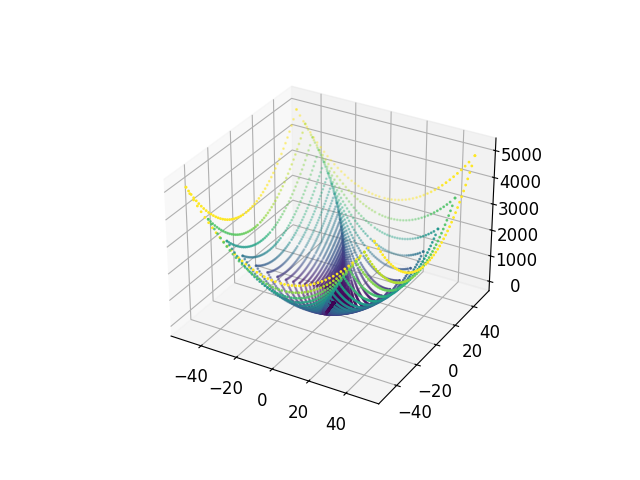

In [92]:
groups = df.groupby("sim")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    # plt.plot(group.theta_zero, group.theta_one, group.cost, 'o-', markersize = 1, linewidth = 1)
    ax.scatter(group.theta_zero, group.theta_one, group.cost, c= group.cost, s = 1)
    

plt.show()
# plt.close()

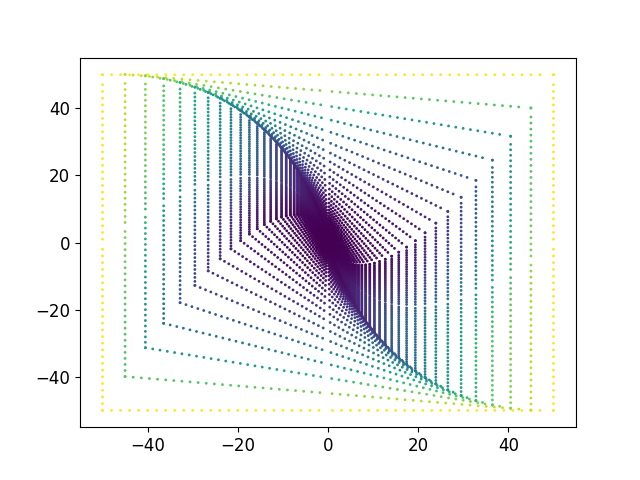

In [93]:
fig = plt.figure()
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    # plt.plot(group.theta_zero, group.theta_one, 'o-', markersize = 1, linewidth = 1)
    plt.scatter(x = group.theta_zero, y = group.theta_one, c = group.cost, s = 1)

plt.show()

In [20]:
rng = np.random.default_rng()
rng.uniform(-10, 10, 2)

array([6.47526961, 2.06181463])

In [21]:
x = np.linspace(-10, 10, num=10)
y = np.linspace(-10, 10, num=10)
t = np.stack(np.meshgrid(x, y), -1).reshape(100, 2)
t[0].reshape(2, 1)

array([[-10.],
       [-10.]])